In [1]:
import pandas as pd

# 크롤링데이터 로드

In [34]:
범죄웹크롤링 = 'C:/Users/COM/Desktop/범죄웹크롤링/'
keywords = ['범죄','이혼','가정폭력','우범']
범죄1=pd.read_csv(범죄웹크롤링+'범죄_1.csv', encoding='cp949')
범죄2=pd.read_csv(범죄웹크롤링+'범죄_2.csv', encoding='cp949')
범죄3=pd.read_csv(범죄웹크롤링+'범죄_3.csv', encoding='cp949')
범죄4=pd.read_csv(범죄웹크롤링+'범죄_4.csv', encoding='cp949')
범죄5=pd.read_csv(범죄웹크롤링+'범죄_5.csv', encoding='cp949')
# 범죄뉴스 = pd.concat([df1,df2,df3,df4,df5])
범죄뉴스 = pd.concat([범죄1,범죄2,범죄3,범죄4,범죄5])
범죄뉴스.reset_index(inplace=True)
범죄뉴스.shape

(77630, 20)

In [3]:
이혼1=pd.read_csv(범죄웹크롤링+'이혼_1.csv', encoding='cp949')
이혼2=pd.read_csv(범죄웹크롤링+'이혼_2.csv', encoding='cp949')
이혼뉴스 = pd.concat([이혼1,이혼2])
이혼뉴스.reset_index(inplace=True)
이혼뉴스.shape

(26775, 20)

In [4]:
가정폭력뉴스=pd.read_csv(범죄웹크롤링+'가정폭력.csv', encoding='cp949')
가정폭력뉴스.shape

(2984, 19)

In [5]:
우범뉴스=pd.read_csv(범죄웹크롤링+'우범.csv', encoding='cp949')
우범뉴스.shape

(1283, 19)

In [159]:
학교폭력뉴스=pd.read_csv(범죄웹크롤링+'학교폭력.csv', encoding='cp949')
학교폭력뉴스.shape

(6978, 19)

# 함수

### 함수1: 주어진df에대해 분류의 집합을 구하는 함수

In [6]:
def 사건사고분류(df):
    사건사고분류리스트=[]
    for i in range(3):
        row = '사건/사고 분류'+f'{i+1}'
        사건사고분류리스트 = 사건사고분류리스트+list(set(df[row].dropna().values))
    for i in range(len(사건사고분류리스트)):
        사건사고분류리스트[i] = 사건사고분류리스트[i].strip()
    사건사고분류 = set(사건사고분류리스트)
    return 사건사고분류

def 통합분류(df):
    통합분류리스트=[]
    for i in range(3):
        row = '통합 분류'+f'{i+1}'
        통합분류리스트 = 통합분류리스트+list(set(df[row].dropna().values))
    for i in range(len(통합분류리스트)):
        통합분류리스트[i] = 통합분류리스트[i].strip()
    통합분류 = set(통합분류리스트)
    return 통합분류

### 함수2:
<pre>
#wordfrequencygraph
시리즈를 넣으면 빈도분석그래프를 그리는 함수
#keywordseries2list
시리즈(한elem이 한기사내의 단어string)-->리스트(한단어가 한elem) 즉, token
</pre>
*키워드열 혹은 특성분석열로 그릴 수 있다.

In [7]:
import pandas as pd
import nltk
from konlpy.tag import Komoran
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline
komoran = Komoran()
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

C:\Anaconda3\lib\site-packages\jpype\_core.py:210: UserWarning: 
-------------------------------------------------------------------------------
Deprecated: convertStrings was not specified when starting the JVM. The default
behavior in JPype will be False starting in JPype 0.8. The recommended setting
for new code is convertStrings=False.  The legacy value of True was assumed for
this session. If you are a user of an application that reported this warning,
please file a ticket with the developer.
-------------------------------------------------------------------------------

  """)


In [8]:
def keywordseries2list(series):
    kwlst = list(series)
    wordlist=[]
    for i in range(len(kwlst)):
        wordlist += str(kwlst[i]).split(",")
    print(f'token: wordlist with {len(wordlist)}words')
    return wordlist
    #'float' object has no attribute 'split' : 숫자만 들어있는게 있나봐
def wordfrequencygraph(seriesorlist):
    if type(seriesorlist)==list:
        print('make list to token')
        print(f'token: wordlist with {len(seriesorlist)}words')
        tokens = seriesorlist
    if type(seriesorlist)==pd.core.series.Series:
        print('make series to token')
        tokens = keywordseries2list(seriesorlist)
    vocab = nltk.Text(tokens)
    plt.figure(figsize=(16,4))
    plt.title('빈도분석')
    vocab.plot(50)
    plt.show()

### 함수3 :
<pre>
#필터링키워드를 넣으면 해당뉴스를 반환하는 함수
범죄뉴스(전체데이터프레임)과 필터링할분류(미성년범죄), 필터링시작점(8)을 넣으면 해당뉴스를 반환하는 함수
#df=범죄뉴스, filt='사건/사고 분류'or'통합 분류', k=8, keyword ='미성년범죄'
</pre>

In [133]:
def classifyfilter(df,filt,m,keyword):
    # 특정 사건사고분류가 담긴 인덱스를 가져온다.
    indexlist=[]
    for j in range(3):
        row = filt+f'{j+1}'
        print(row)
        for i in range(len(df)):
            for word in keyword:
                if str(df[row][i])[m:] == word:
                    #print(str(범죄뉴스['사건/사고 분류1'][i])[8:])
                    indexlist.append(i)
    print(f'{len(indexlist)} news filtered')
    #전체데이터프레임에서 조건에 해당하는 뉴스행만 뽑는다.
    return df.loc[df.index.isin(indexlist)==True]

### 함수4: 제목들의 명사리스트를 만드는 함수
<pre>
#분할된 시리즈.tolist()를 반복적으로 읽어 통합된리스트(한word가 한elem)로 만드는 함수
#리스트를 반복해서 건네고 마지막 titlelist를 만든다.
</pre>

In [10]:
import re
#여러개의 읽은 파일들에서  나중에 제목의 명사만 통합할 리스트.
titlenouns=[]
def titlelist2titlenouns(lst):
    for i,elem in enumerate(lst):
        elem = re.sub('[^0-9a-zA-Zㄱ-힗]', ' ', str(elem))
    #리스트의 한elem단위로 토크나이징
    transaction = []
    for n in lst:
        transelem = komoran.nouns(str(n))
        transaction.append(transelem)
    #한글자제거
    fin_lst=[]
    for n in transaction:
        two_lst = []
        for i in n:
            if len(i)<=1:
                pass
            else:
                two_lst.append(i)
        fin_lst.append(two_lst)
    #명사리스트로
    for i in fin_lst:
        for n in i:
            titlenouns.append(n)
    print(f'titlenouns with {len(titlenouns)} words')
    return titlenouns

# 함수사용정리
### 1

In [11]:
# 사건사고분류(범죄뉴스)

In [12]:
# 통합분류(범죄뉴스)

### 2

In [13]:
# #키워드열로 빈도분석
# wordfrequencygraph(범죄뉴스.키워드)
# #특성추출열로 빈도분석
# wordfrequencygraph(범죄뉴스.특성추출)

### 3

In [14]:
# #필터링
# 범죄뉴스_미성년범죄 = classifyfilter(범죄뉴스,'사건/사고 분류',8,'미성년범죄')
# wordfrequencygraph(범죄뉴스_미성년범죄.키워드)
# wordfrequencygraph(범죄뉴스_미성년범죄.특성추출)

### 4

In [15]:
# #제목의 명사로 분석
# titlenouns=[]

In [16]:
# titlenouns = titlelist2titlenouns(범죄3.제목.tolist())

In [17]:
# wordfrequencygraph(titlenouns)

# 빈도분석그래프: '범죄'

In [18]:
# [전체 제목]

In [160]:
titlenouns=[]

In [161]:
titlenouns = titlelist2titlenouns(학교폭력뉴스.제목.tolist())

titlenouns with 41957 words


make list to token
token: wordlist with 41957words


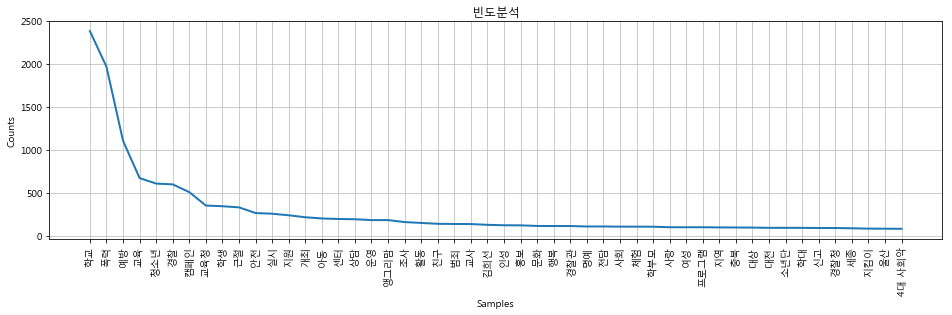

In [162]:
wordfrequencygraph(titlenouns)

In [78]:
# [전체 키워드]

make series to token
token: wordlist with 969501words


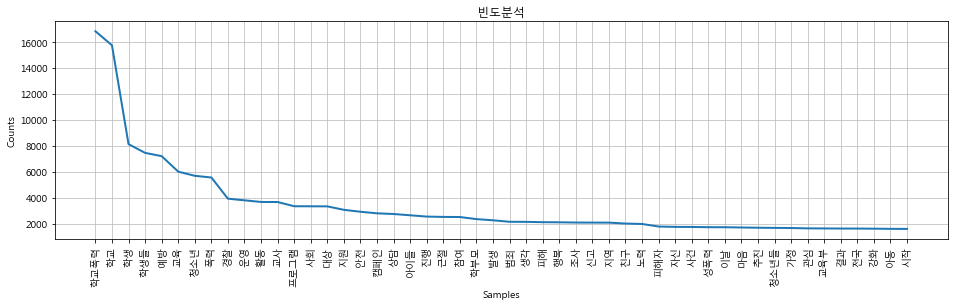

In [163]:
wordfrequencygraph(학교폭력뉴스.키워드)

In [80]:
# [전체 특성추출]

make series to token
token: wordlist with 194044words


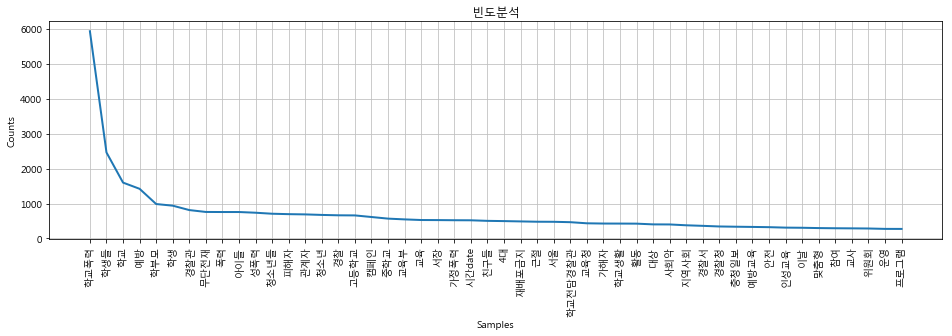

In [164]:
wordfrequencygraph(학교폭력뉴스.특성추출)

# filtered

In [141]:
# [필터링 제목]:미성년범죄

사건/사고 분류1
사건/사고 분류2
사건/사고 분류3
12 news filtered
titlenouns with 63 words
make list to token
token: wordlist with 63words


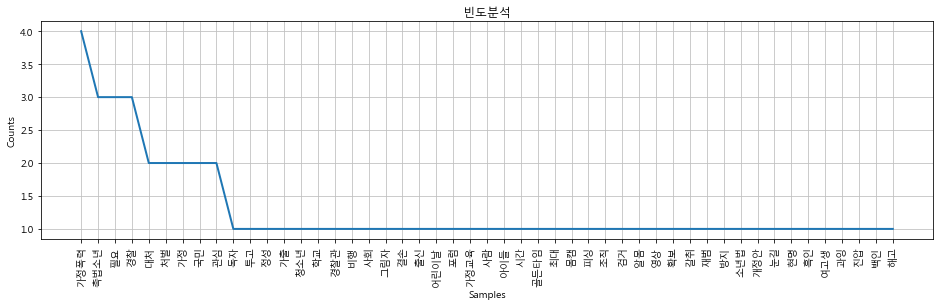

In [147]:
전체뉴스_필터단어 = classifyfilter(이혼뉴스,'사건/사고 분류',8,['미성년범죄'])
titlenouns=[]
titlenouns = titlelist2titlenouns(전체뉴스_필터단어.제목.tolist())
wordfrequencygraph(titlenouns)

In [148]:
# [필터링 키워드]

make series to token
token: wordlist with 2193words


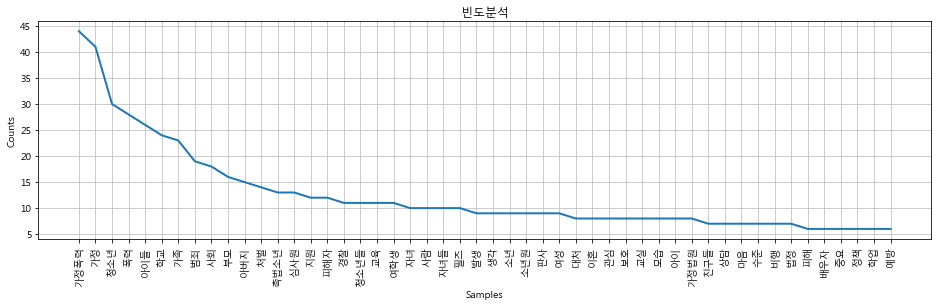

In [149]:
wordfrequencygraph(전체뉴스_필터단어.키워드)

In [150]:
# [필터링 특성추출]

make series to token
token: wordlist with 347words


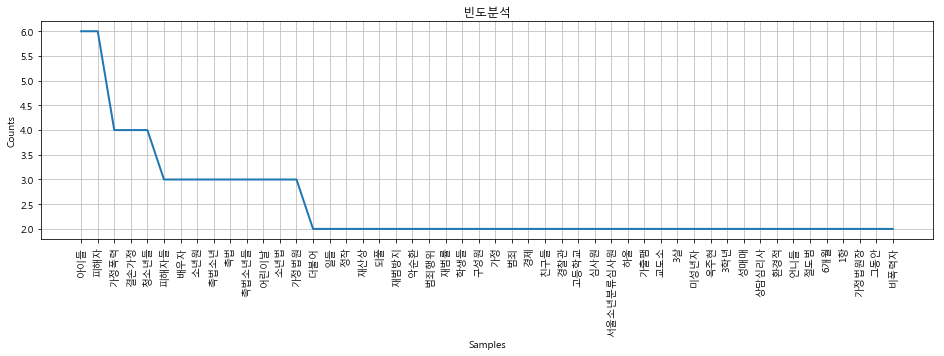

In [151]:
wordfrequencygraph(전체뉴스_필터단어.특성추출)

In [157]:
전체뉴스_필터단어.loc[:,['제목','본문']]

,제목,본문
6918,독자투고- 가정폭력 제대로 알고 대처하자,해마다 가정폭력 발생과 재범률은 증가하고 있지만 정작 그 피해자들은 사안이 경미하거...
10942,"석달의 정성 '달방' 가출청소년, 학교로 돌려보낸 경찰관",#전북 전주에 사는 민혁이(17 가명)는 15~17살 또래 친구 네 명과 시내의 한...
12238,"“처벌 안받아서 비행한다고?” 촉법소년, 어디까지 아시나요?",［헤럴드경제=강승연ㆍ김진원 기자］“어린이날로 받고 싶은 선물요? 옥주현 언니 뮤지컬...
12309,우리사회의 그림자 ‘결손가정 출신’ 촉법소년의 어린이날,［헤럴드경제=김진원 기자］“어린이날로 받고 싶은 선물요? 옥주현 언니 뮤지컬 앨범이...
13163,[포럼] 가정교육이 위대한 사람 만든다,"5월은 푸른 하늘만 우러러 보아도 가슴이 울렁거리는 희망의 계절이며 어린이날, 어버..."
14273,아이들과 함께 하는 시간이 가정의 골든타임,"소년부 법정에서 만난 아버지들 안타까운 모습 담아 책 출간\n""가정이 안전기지가 되..."
14533,최대 '몸캠' 피싱 조직 검거 알몸영상 확보 후 돈 갈취,◀ 앵커 ▶채팅으로 음란 행위를 하는 동영상을 확보한 뒤 남성들에게 돈을 뜯어내는 ...
14766,처벌 안 받는 ‘촉법소년’ 재범방지 돕는 ‘소년법’ 개정안 눈길,아주경제 조문식 기자 =?범죄를 저질러도 대부분 처벌을 받지 않고 있는 ‘촉법소년(...
20695,가정폭력 현명한 대처 필요하다,해마다 가정폭력 발생과 재범률은 증가하고 있지만 정작 그 피해자들은 사안이 경미하거...
23293,[경찰의 눈] '가정폭력' 전 국민적 관심이 필요한 때,[대전=중도일보] 가정폭력 문제는 오늘날 새삼스러운 것은 아니다. 가족은 사적인 영...


In [152]:
사건사고분류(이혼뉴스)

{'범죄>기업범죄>거래제한',
 '범죄>기업범죄>계약위반',
 '범죄>기업범죄>내부자거래',
 '범죄>기업범죄>반독점범죄',
 '범죄>기업범죄>횡령',
 '범죄>범죄일반>마약',
 '범죄>범죄일반>방화',
 '범죄>범죄일반>사기',
 '범죄>범죄일반>살인',
 '범죄>범죄일반>유괴/납치',
 '범죄>범죄일반>절도',
 '범죄>범죄일반>폭행',
 '범죄>성범죄>성매매',
 '범죄>성범죄>성추행',
 '범죄>성범죄>성폭행',
 '범죄>성범죄>성희롱',
 '범죄>성범죄>음란물',
 '범죄>정치>뇌물수수',
 '사고>교통사고>노상사고',
 '사고>교통사고>철도사고',
 '사고>교통사고>항공사고',
 '사고>교통사고>해상사고',
 '사고>산업사고>붕괴',
 '사고>산업사고>원자력사고',
 '사고>산업사고>폭발',
 '사고>산업사고>화재',
 '사회>사회갈등>대량학살',
 '사회>사회갈등>시위',
 '사회>사회갈등>전쟁',
 '사회>사회갈등>테러행위',
 '사회>사회문제>노예',
 '사회>사회문제>미성년범죄',
 '사회>사회문제>자살',
 '사회>사회문제>중독',
 '사회>사회문제>학대',
 '재해>자연재해>가뭄',
 '재해>자연재해>눈사태_산사태',
 '재해>자연재해>지진',
 '재해>자연재해>태풍',
 '재해>자연재해>폭염',
 '재해>자연재해>홍수',
 '재해>자연재해>화산폭발'}

In [100]:
통합분류(이혼뉴스)

{'IT_과학>IT_과학일반',
 'IT_과학>과학',
 'IT_과학>모바일',
 'IT_과학>보안',
 'IT_과학>인터넷_SNS',
 'IT_과학>콘텐츠',
 '경제>경제일반',
 '경제>국제경제',
 '경제>금융_재테크',
 '경제>무역',
 '경제>반도체',
 '경제>부동산',
 '경제>산업_기업',
 '경제>서비스_쇼핑',
 '경제>외환',
 '경제>유통',
 '경제>자동차',
 '경제>자원',
 '경제>증권_증시',
 '경제>취업_창업',
 '국제>국제일반',
 '국제>러시아',
 '국제>미국_북미',
 '국제>아시아',
 '국제>유럽_EU',
 '국제>일본',
 '국제>중국',
 '국제>중남미',
 '국제>중동_아프리카',
 '문화>문화일반',
 '문화>미술_건축',
 '문화>방송_연예',
 '문화>생활',
 '문화>영화',
 '문화>요리_여행',
 '문화>음악',
 '문화>전시_공연',
 '문화>종교',
 '문화>출판',
 '문화>학술_문화재',
 '미분류',
 '사회>교육_시험',
 '사회>날씨',
 '사회>노동_복지',
 '사회>미디어',
 '사회>사건_사고',
 '사회>사회일반',
 '사회>여성',
 '사회>의료_건강',
 '사회>장애인',
 '사회>환경',
 '스포츠>골프',
 '스포츠>농구_배구',
 '스포츠>스포츠일반',
 '스포츠>야구',
 '스포츠>야구>메이저리그',
 '스포츠>야구>일본프로야구',
 '스포츠>야구>한국프로야구',
 '스포츠>올림픽_아시안게임',
 '스포츠>월드컵',
 '스포츠>축구',
 '스포츠>축구>국가대표팀',
 '스포츠>축구>한국프로축구',
 '스포츠>축구>해외축구',
 '정치>국회_정당',
 '정치>북한',
 '정치>선거',
 '정치>외교',
 '정치>정치일반',
 '정치>청와대',
 '정치>행정_자치',
 '지역>강원',
 '지역>경기',
 '지역>경남',
 '지역>경북',
 '지역>광주',
 '지역>대구',
 '지역>대전',
 '지역>부산',
 '지역>울산',
 '지역>전남',
 '지역>전북',
 '지역